# House Price Prediction
## PROBLEM STATEMENT

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
pd.set_option('max.columns',None)

C:\Users\NAELUSAVI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
## Load the data into dataframe
train = pd.read_csv('train.csv')

## No of Rows in a dataframe
print('No of rows in a dataframe',len(train))

train_ID = train['Id']
train = train.drop('Id',axis=1)

No of rows in a dataframe 1460


In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Analyise Sales Price Variable

In [4]:
## Getting describe
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

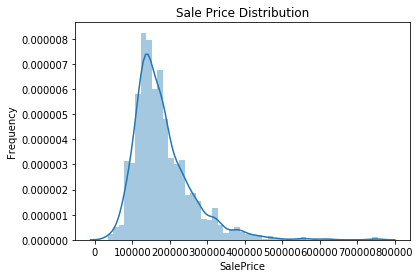

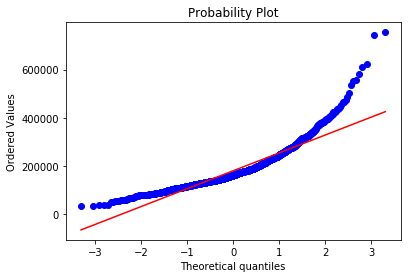

In [5]:
# Plot Histogram
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Observation - 

- From the distribution plot, we came to know that the sale price has deviation from the normal distribution.
- From the probability plot, we can say that the sales price has nice peak value and the plot is not huggiing the prediction line which we have decided.

## Multi Variable Analysis

- There are two types of features namely numerical and categorical.
- The categorical data is either 'Yes' and 'No','Fare' and 'Near'
- The numerical data in numerical form. These features are in a linear relationship with each other. For example, a 2,000 square foot place is 2 times "bigger" than a 1,000 square foot place.

In [6]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

- The above columns define the columns of type object
- Object is nothing but column of type categorical values

In [7]:
train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

- The above columns define the columns of type int64 and float64
- int64 and floats are nothing but column of type numeric

In [8]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(exclude=['object']).columns)

print('Total Categorical Features are ',cat)
print('Total Numerical Features are ',num)

Total Categorical Features are  43
Total Numerical Features are  37


With 81 Features, 43 Features are Categorical, 37 are Numerical

## Correlation Matrix

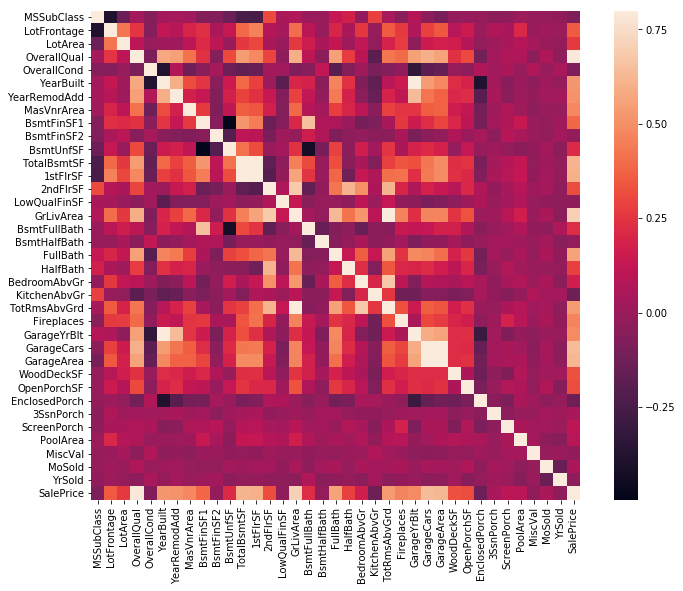

In [9]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

### Top 10 Correlated Variable - Correlation Matrix

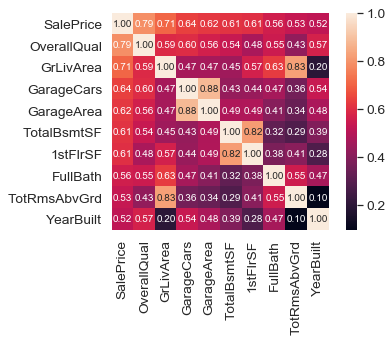

In [10]:
 # Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Top 10 Columns which are correlated

In [11]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


The Definition against Top 9 correlated features provided below:
- OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- FullBath: Full bathrooms above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- YearBuilt: Original construction date

### Overall Quality Vs Sale Price


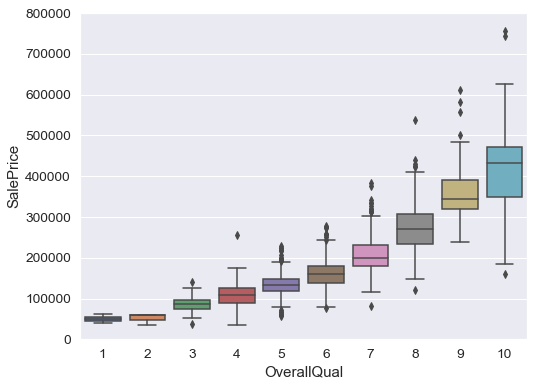

In [12]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Observation -

- The plot defines we can state that as OverallQual increases, the SalePrice also increases.
- The above assumption is true on normal assumption also, As OverallQual is more the SalePrice is also more.

### GrLivArea Vs SalePrice

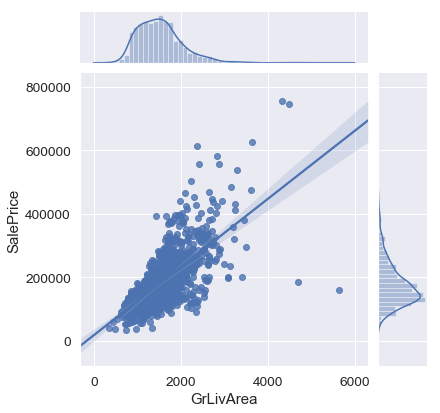

In [13]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'],kind='reg')

### Observation -

- People pay more for more living area.
- In the above plot, there is a value which has least cost for more living area. It is better to remove it 

In [14]:
## Remove the outlier manually
train = train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<=200000)].index)

#### After removing the outlier

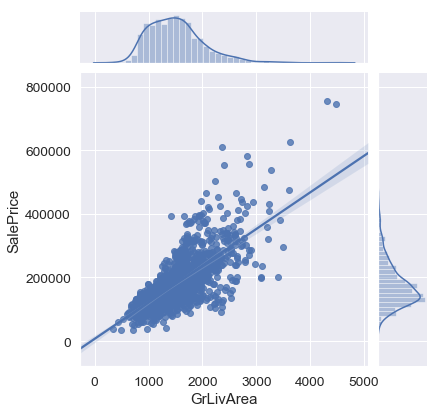

In [15]:
sns.jointplot(train['GrLivArea'],train['SalePrice'],kind='reg')

### GarageCars Vs SalePrice

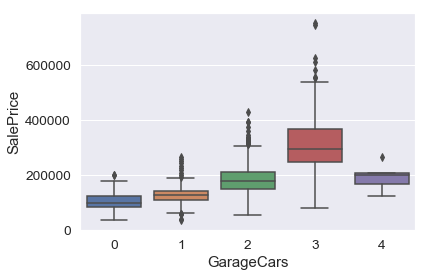

In [16]:
sns.boxplot(x=train['GarageCars'],y=train['SalePrice'])

### Observation

- From the above plot we can say that for GarageCars of 3, the SalePrice is more.
- But strange is that the GarageCars==4 having less cost, As it is a outlier we can remove this outlier 

### GarageArea Vs SalePrice

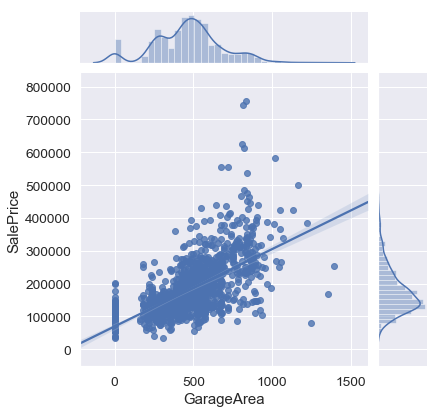

In [17]:
sns.jointplot(x=train['GarageArea'],y=train['SalePrice'],kind='reg')

### Observation

- From the above plot we can say that for GarageArea of 200-1000 has most of the SalePrice.
- But strange is that the GarageArea>=1000 having less cost, As it is a outlier we can remove this outlier 

#### After removing Outlier

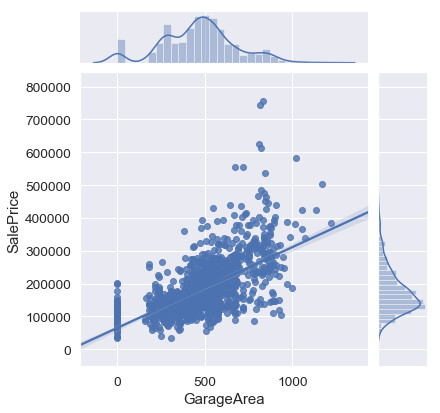

In [18]:
train = train.drop(train[(train['GarageArea']>1000)&(train['SalePrice']<300000)].index)
sns.jointplot(train['GarageArea'],train['SalePrice'],kind='reg')

### 1stFlrSF Vs SalePrice

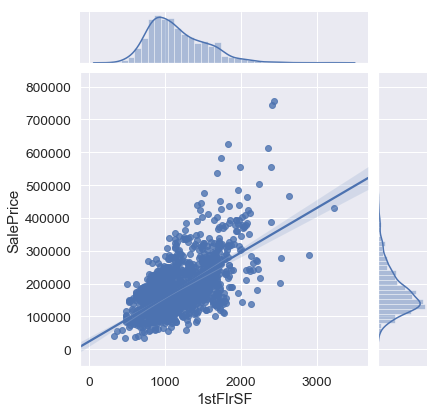

In [19]:
sns.jointplot(x=train['1stFlrSF'],y=train['SalePrice'],kind='reg')

### Observation

- From the above plot we can say that for 1stFirSF of 500-2000 has most of the SalePrice.
- We can see as 1st floor square feet increases, the SalePrice also increases

### TotRmsAbvGrd Vs SalePrice

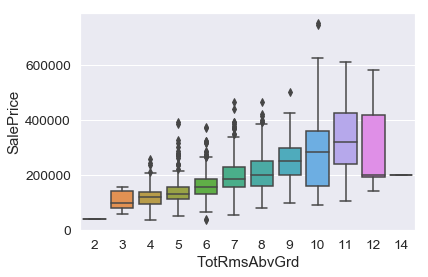

In [20]:
sns.boxplot(x=train['TotRmsAbvGrd'],y=train['SalePrice'])

### Observation

- From the above plot we can say that for TotRmsAbvGrd having more than 11 rows has less weight.
- May be those are old enough due to which they cost less, But it  is just assumption.

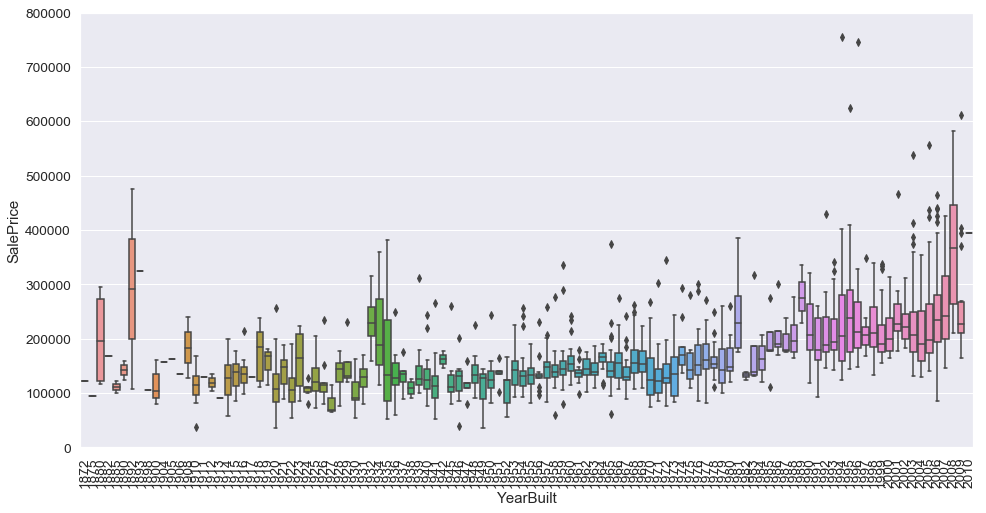

In [21]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt',y='SalePrice',data = train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Observation -

- Even we see as the building ages the cost is both increasing and decreasing. Our assumption was if the building cost is less for a big house, it might be because it was old. But now even if the building is old, The cost seems to be high
- So the reason may be because of stock market crashes.


### Missing value treatment

- We have to know the reason behind the missing values, instead of we dropping the rows blindly 
less us proceed in convicting the column so that the missing data process is not biased and hiding an inconvenient truth.



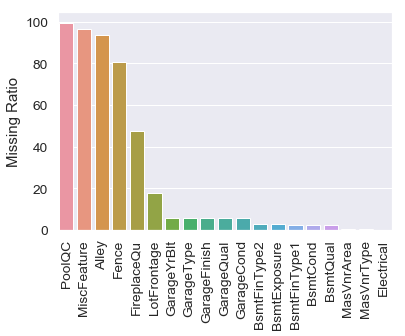

In [22]:
## Find the ratio of missing values 
nan = train.isnull().sum()/len(train)*100
nan = pd.DataFrame(nan.drop(nan[nan==0].index).sort_values(ascending=False)[:30]).rename(columns={0:'Missing Ratio'})


## View thw plot
plt.xticks(rotation=90)
sns.barplot(x=nan.index,y=nan['Missing Ratio'])

### Imputing Missing Values

- PoolQC : data description says NA means "No Pool"
- MiscFeature : data description says NA means "no misc feature"
- Alley : data description says NA means "no alley access"
- Fence : data description says NA means "no fence"
- FireplaceQu : data description says NA means "no fireplace"
- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
- GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with "None".
- GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0.
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath: Replacing missing data with 0.
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there isn't a basement.
- MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
- MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'.
- Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
- Functional : data description says NA means typical.
- Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
- KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
- Exterior1st and Exterior2nd : Both Exterior 1 & 2 have only one missing value. We will just substitute in the most
common string
- SaleType : Fill in again with most frequent which is "WD"
- MSSubClass : Na most likely means No building class. We can replace missing values with None

In [23]:
train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train = train.drop(['Utilities'], axis=1)
train["Functional"] = train["Functional"].fillna("Typ")
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")

In [24]:
# Check if there are any missing values left
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### 5. Feature Transformation/Engineering

Below are some feature which are misinterpreted as numeric while they are categorical variables.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
 
MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

In the further steps we will make it categorical variables.

In [25]:
## MSSubClass =The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)

## Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)

## Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

### Label Encoding for Categorical columns

In [26]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Process columns and apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# Check shape        
print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1452, 79)


### Normalising the Target Variable

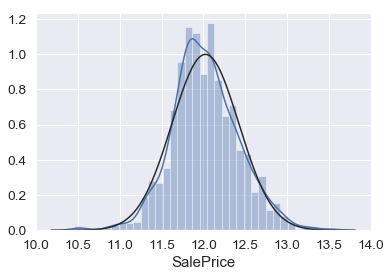

In [27]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

In [28]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)
    train[feat] += 1

train = pd.get_dummies(train)
print(train.shape)

There are 59 skewed numerical features to Box Cox transform
(1452, 220)


## Model Building

In [29]:
y = train[['SalePrice']]
X = train[[ele for ele in train.columns if ele!='SalePrice']]
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Ridge

In [30]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                       scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)         
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

### Plot decide on optimum value of alpha

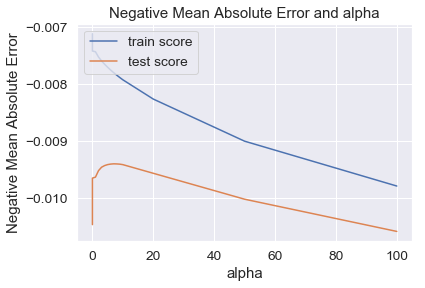

In [31]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observation

- The above plot defines the way to decide the optimum value of alpha.
- The point in which train and test score has less gap between them is the value which we take as an optimum value of alpha
- From the above plot, we came to know that the value with alpha = 10 has minimum gap between the test and train score.

### R2  Value for optimum alpha value

In [32]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print('The r2 value for train data using Rigde Regression ',ridge.score(X_train,y_train))
print('The r2 value for train data using Rigde Regression ',ridge.score(X_test,y_test))

The r2 value for train data using Rigde Regression  0.9368658742480027
The r2 value for train data using Rigde Regression  0.9011752415932732


### Observation

- From the above result, we can see the train data has 0.94 as its R2 value, on test data we have 0.90 as R2 value. So it is pretty much predicting well.
- We can say it hasnt overfitted because the test data(90% r2 value) comparable value when compared to train data(94% r2 value)

### Lasso

In [33]:
## List of alpha to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

## Cross Validation
folds = 5
model_csv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose=1)
model_csv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

### Plot decide on optimum value of alpha

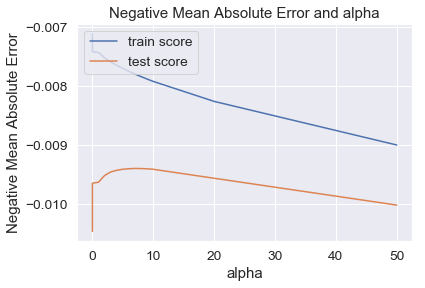

In [34]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<100]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Observation

- The above plot defines the way to decide the optimum value of alpha.
- The point in which train and test score has less gap between them is the value which we take as an optimum value of alpha
- From the above plot, we came to know that the value with alpha = 0.0001 has minimum gap between the test and train score.

### R2  Value for optimum alpha value

In [35]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print('The r2 value for train data using Rigde Regression ',lasso.score(X_train,y_train))
print('The r2 value for train data using Rigde Regression ',lasso.score(X_test,y_test))

The r2 value for train data using Rigde Regression  0.929902822301988
The r2 value for train data using Rigde Regression  0.8982673232022554


### Observation

- From the above result, we can see the train data has 0.93 as its R2 value, on test data we have 0.90 as R2 value. So it is pretty much predicting well.
- We can say it hasnt overfitted because the test data(90% r2 value) comparable value when compared to train data(94% r2 value)

## Conclusion

- From the above two technique of Lasso and Ridge Regression, we can say that both almost having the same r2 value. 
- When comparing the complexity, it is better to use Lasso because as we have 221 variable, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all 221 variables with the reducing the coefficient of variables